# SQLITE

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sqlite3

# membaca dataset
# Connect to SQLite database
conn = sqlite3.connect('hotel-directories-ORI.sqlite3')

# Check available tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables in the database:", tables['name'].tolist())

# Load data from SQLite table into a DataFrame
df = pd.read_sql_query("SELECT * FROM hotel_yogyakarta", conn)

# Close the connection
conn.close()

# Memisahkan fitur dan label
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
# Alternatif
# x = df.drop('harga', axis=1)
# y = df['harga']

# membagi data menjadi data training dan data testing dengan perbandingan 80:20
# Random state digunakan untuk mengatur agar pembagian data menjadi sama setiap kali dijalankan (dapat diisi dengan angka berapapun)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# menampilkan ukuran data training dan data testing
trainRatio = round(x_train.shape[0]/len(df), 2)*100
testRatio = round(x_test.shape[0]/len(df), 2)*100

print(f'Train set: {x_train.shape[0]} ({trainRatio}%)')
print(f'Test set: {x_test.shape[0]} ({testRatio}%)')

Available tables in the database: ['migrations', 'sqlite_sequence', 'migrations_lock', 'hotel_room_yogyakarta', 'hotel_yogyakarta']
Train set: 302 (80.0%)
Test set: 76 (20.0%)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

rf = RandomForestRegressor()

rf.fit(x_train_encoded, y_train)

# menampilkan skor akurasi dari model
print(f'Skor R2: {rf.score(x_test_encoded, y_test)}')

Skor R2: 0.32202502205365435


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train)
x_test_encoded = encoder.transform(x_test)

# menentukan parameter yang akan dicoba
rfParams = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
}

# mencari parameter terbaik
rfRandom = RandomizedSearchCV(rf, rfParams, random_state=123, n_jobs=-1)

rfRandom.fit(x_train_encoded, y_train)

# menampilkan parameter terbaik
print(f'Parameter terbaik: {rfRandom.best_params_}')

# menampilkan skor akurasi dari model
print(f'Skor R2: {rfRandom.score(x_test_encoded, y_test)}')

Parameter terbaik: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}
Skor R2: 0.4026589076154552


In [30]:
import pickle

# Convert categorical variables to dummy variables
x_train_encoded = pd.get_dummies(x_train)
x_test_encoded = pd.get_dummies(x_test)

# Ensure the columns in the test set match the training set
x_test_encoded = x_test_encoded.reindex(columns=x_train_encoded.columns, fill_value=0)

# refit model dengan parameter terbaik
rfModel = rfRandom.best_estimator_.fit(x_train_encoded, y_train) 

# menyimpan model
pickle.dump(rfModel, open('rfModel.pkl', 'wb'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

NUll Value : 
 Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

Akurasi Model :  1.0


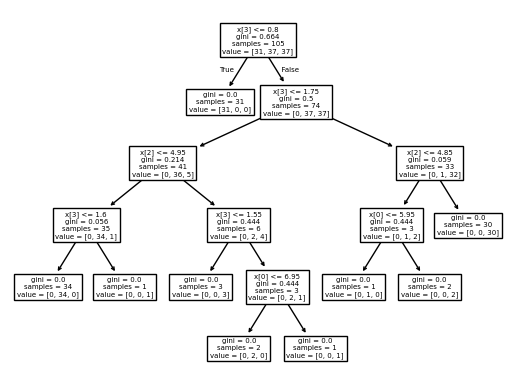

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Buat DataFrame
df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

# Rename column dataframe
df = df.rename(columns={'feature_0':'Sepal Length','feature_1':'Sepal Width','feature_2':'Petal Length','feature_3':'Petal Width','target':'Species'})

# gantikan nilai kolom Spesies dengan nama spesies
replace_value = {0:'Iris Setosa', 1:'Iris Versicolour',2:'Iris Virginica'}

# replace the values of Species columns
df['Species'] = df['Species'].replace(replace_value)

# Checking Data
print(df.info())
print("")
print("NUll Value : \n",df.isnull().sum())

# separate the feature and target
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# spliting data into Data train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 42)

# making model Decision Tree
Tree = DecisionTreeClassifier() 
# Train data using model
Tree.fit(x_train,y_train)

# predict the data using model
ypred = Tree.predict(x_test)
# calculate the accuracy of model
accuracy = accuracy_score(y_test,ypred)
print("")
print("Akurasi Model : " ,accuracy)

# display tree plot
tree.plot_tree(Tree)
plt.show()


In [ ]:

# Import library yang dibutuhkan
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris

# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Menggunakan OneHotEncoder untuk mengonversi label menjadi one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Normalisasi data
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Membangun model ANN menggunakan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, input_shape=(4,), activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Menentukan fungsi loss, optimizer, dan metrik
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

# Evaluasi model pada data pengujian
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Akurasi pada data pengujian: {accuracy * 100:.2f}%')

Epoch 1/50


C:\Users\musta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3237 - loss: 1.4528 - val_accuracy: 0.3000 - val_loss: 1.3577
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3402 - loss: 1.3326 - val_accuracy: 0.3000 - val_loss: 1.2786
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3519 - loss: 1.2878 - val_accuracy: 0.3000 - val_loss: 1.2051
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3775 - loss: 1.1595 - val_accuracy: 0.3000 - val_loss: 1.1385
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3418 - loss: 1.1074 - val_accuracy: 0.4000 - val_loss: 1.0730
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3715 - loss: 1.0634 - val_accuracy: 0.5333 - val_loss: 1.0116
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5115 - loss: 1.0224 - val_accuracy: 0.6000 - val_loss: 0.9553
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5863 - loss: 0.9712 - val_accuracy: 0.6667 - val_loss: 0.9004
Ep

# K-Means

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64
[[ 0.74291541  0.31212243 -0.37878978 ... -0.59048916 -0.52379654
  -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211  ...  1.51296181 -0.52379654
   0.39138677]
 [-0.25251804  0.31212243  0.2117124  ...  0.80170393  1.90913822
   1.59755385]
 ...
 [-1.24795149  2.46906604 -1.26454304 ...  0.03863257  1.90913822
   3.45892281]
 [-0.37694723 -0.76634938  0.50696349 ... -0.70147601 -0.52379654
  -1.08281745]
 [ 2.1116364  -0.76634938  1.09746566 ...  0.16463355 -0.52379654
  -0.2340332 ]]
[1 0 2 1 0 0 1 1 1 0 2 1 1 1 2 1 1 1 0 1 1 1 2 0 0 1 1 1 1 1 1 0 2 1 1 1 2
 2 1 0 2 0 1 0 1 0 1 1 1 1 0 0 2 1 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 0 1 1 2 0 1 0 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 0 1 2 2 0 1 1 1 1 1
 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 

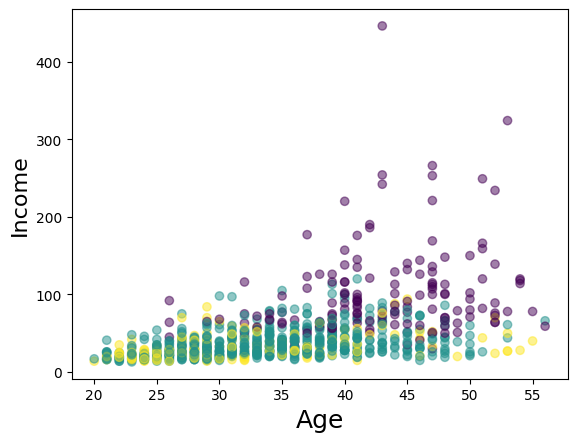

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("Cust_Segmentation.csv")
df.head()

# drop address column
df = df.drop('Address', axis=1)
df.head()

# check null values
print(df.isnull().sum())

# input the features except cust id to X
X = df.values[:,1:]
# repacle nan value to 0
X = np.nan_to_num(X)
# use StandardScaler
Clus_dataSet = StandardScaler().fit_transform(X)
print(Clus_dataSet)

# making Kmeans Model
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
# train the dataset with kmeans model
k_means.fit(Clus_dataSet)
# make kmeans labels
labels = k_means.labels_
print(labels)

# insert labels into dataset columns
df["Clus_km"] = labels
df.head(5)
# gruping by clus_km column 
print(df.groupby('Clus_km').mean())

# make scatter plot
plt.scatter(df.iloc[:, 1], df.iloc[:, 4], c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

# REGRESSION

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import jaccard_score as js
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

# Linear Regression

# load the dataset
df_raw = pd.read_csv('FuelConsumption.csv')

# displaying dataframe
df_raw.head()

# show dataframe description
df_raw.describe()

# take some important feature
df = df_raw[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head()

# checking dataframe
# df.info()
df.isnull().sum()

# separate between feature and target
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

# splitting data into data train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3 ,random_state = 42)

# making Linear model
LinearReg = LinearRegression()
LinearReg.fit(x_train,y_train)

# predict the data
ypred = LinearReg.predict(x_test)

# calculate the mae, mse, R2
LinearRegression_MAE = mae(y_test,ypred)
LinearRegression_MSE = mse(y_test,ypred)
LinearRegression_R2 = r2_score(y_test,ypred)

Report = [[LinearRegression_MAE,LinearRegression_MSE,LinearRegression_R2]] 
pd.DataFrame(Report , columns=['MAE','MSE','R2'], index = ["Linear Regression"])


,MAE,MSE,R2
Linear Regression,16.5393,503.603151,0.875145


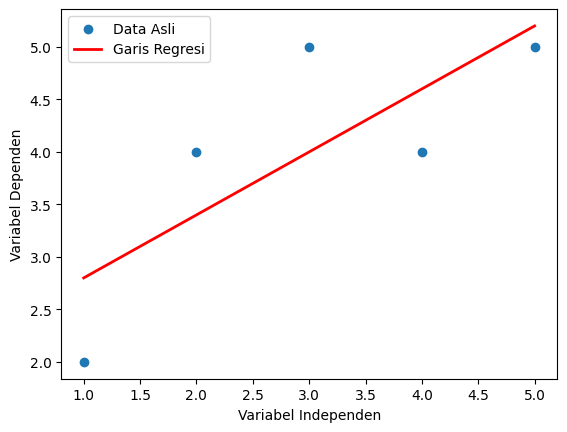

In [ ]:

# Impor library yang diperlukan
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Data contoh
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Variabel independen (misalnya, waktu)
y = np.array([2, 4, 5, 4, 5])  # Variabel dependen (misalnya, hasil pengukuran)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model dengan data
model.fit(X, y)

# Membuat prediksi dengan model
y_pred = model.predict(X)

# Plot data asli dan garis regresi
plt.scatter(X, y, label='Data Asli')
plt.plot(X, y_pred, color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Variabel Independen')
plt.ylabel('Variabel Dependen')
plt.legend()
plt.show()


In [ ]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import jaccard_score as js
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

# Logistic Regression
df_raw = pd.read_csv('Weather_data.csv')

# print(df_raw.head(10))

# Separate the unique value to new column
df = pd.get_dummies(data=df_raw, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

# Replace No and Yes to 0 and 1
df.replace(['No', 'Yes'], [0,1], inplace=True)

# Drop Date Column
df.drop('Date', axis = 1 , inplace = True)

# Separate dataframe to Feature and Target
X = df.drop(columns = 'RainTomorrow',axis = 1)
Y = df['RainTomorrow']

# Split data to data train and test
x_train , x_test , y_train,y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 42)

# make Logistic Model
LR = LogisticRegression(solver = 'liblinear')
LR.fit(x_train,y_train)

# predict data using model
ypred = LR.predict(x_test)
predict_proba = LR.predict_proba(x_test)

# Calculate the accuracy , jaccard, F1 , log loss and confusion matrix
LR_Accuracy_Score = asc(y_test,ypred)
LR_JaccardIndex = js(y_test,ypred)
LR_F1_Score = f1s(y_test,ypred)
LR_Log_Loss = log_loss(y_test,predict_proba)
LR_Confusion_Matrix = confusion_matrix(y_test,ypred)

Report = [[LR_Accuracy_Score,LR_JaccardIndex,LR_F1_Score,LR_Log_Loss,LR_Confusion_Matrix]] 
pd.DataFrame(Report , columns=['Accuracy','Jaccard','F1','Log Loss','CM'], index = ["Linear Regression"])

C:\Users\musta\AppData\Local\Temp\ipykernel_92636\3226822523.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['No', 'Yes'], [0,1], inplace=True)


,Accuracy,Jaccard,F1,Log Loss,CM
Linear Regression,0.827481,0.466981,0.636656,0.411985,"[[443, 33], [80, 99]]"


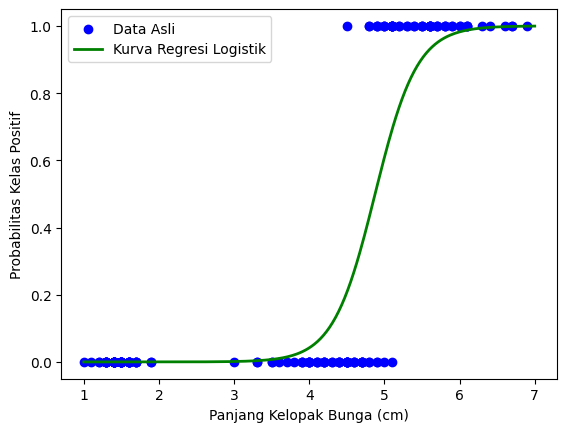

In [ ]:

# Impor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, 2:3]  # Menggunakan satu fitur (panjang kelopak bunga)
y = (iris.target == 2).astype(int)  # Menggunakan kelas "versicolor" sebagai kelas positif (1), yang lain sebagai negatif (0)

# Membuat model regresi logistik
model = LogisticRegression()

# Melatih model dengan data
model.fit(X, y)

# Plot data asli
plt.scatter(X, y, c='b', marker='o', label='Data Asli')

# Membuat kurva regresi logistik
X_test = np.linspace(1, 7, 300).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilitas kelas 1
plt.plot(X_test, y_prob, color='green', linewidth=2, label='Kurva Regresi Logistik')

plt.xlabel('Panjang Kelopak Bunga (cm)')
plt.ylabel('Probabilitas Kelas Positif')
plt.legend()
plt.show()